Импорт библиотек и решений

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import FNN # файл с решением FNN.py алгоритм для поиска оптимальной размерности
import rosenstein # файл с решением rosenstein.py
import Entropy_Complexity # файл с решением Entropy_Complexity.py построение плоскости энтропия/сложность

функция для вычисления горизонта прогнозирования

In [2]:
def forecast_horizon(lapunov, E_max, s):
    '''
    Input:
        lapunov - float parameter
        E_max - float parameter
        s - float parameter (<= 1)
    Output:
        T - float
    Description:
        Calculates estimation of forecast horizon
    '''
    T = (1/lapunov)*np.log(E_max/s)
    return T

читаем ряд лоренца

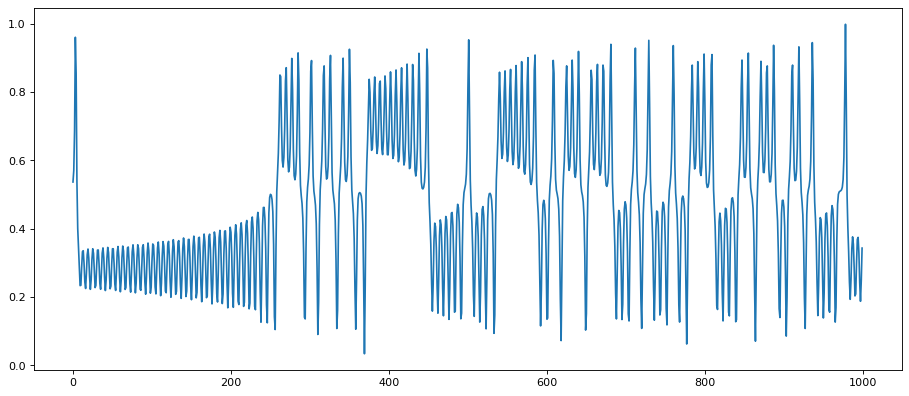

In [3]:
full_lorenz = np.loadtxt("lorenz.txt")
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(full_lorenz[:1000])
lorenz = full_lorenz[:10000]

читаем ряд количества солнечных пятен по дням

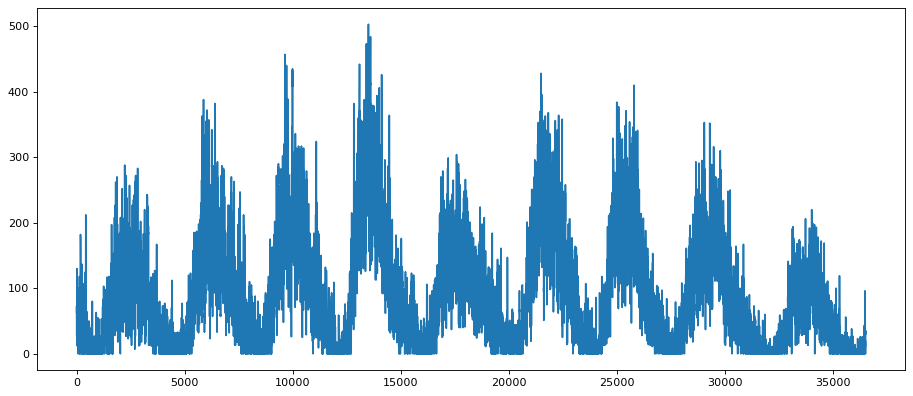

In [4]:
sunspot_df = pd.read_csv("sunspot.csv", sep=";", 
                         names=["year", "month", "day", "decimal_year", "sunspots", "deviation", "observations", "ind"])
full_sunspot = sunspot_df["sunspots"].values
sunspot = full_sunspot[-36798:-273] #01.01.1921 - 01.01.2021; 100 years; 36525 days
fig = plt.figure(figsize=(14, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(sunspot)

sunspot = sunspot[:10000]

Я ПРОСТО ТУПОЙ

Несколько часов искались ложные ближайшие соседи для 10тыс значений, но я зачем-то включил последний шаг, из-за которого возникла ошибка, и результатов теперь нет никаких... Пересчитать неуспеваю, даже с учетом, что до дедлайна еще много времени

In [7]:
ms = [i for i in range(2, 10)]
ms += [i for i in range(10, 200, 10)]
ms += [i for i in range(200, 1000, 50)]
ms += [i for i in range(1000, 10001, 250)]

print(ms)

lorenz_result = FNN.FNN(lorenz, ms, A=0.1, B=0.1)
with open('lorenz_results.npy', 'wb') as f:
    np.save(f, ms)
    np.save(f, lorenz_result)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000]
10000

ValueError: data must be 2 dimensions

Но успеваю для меньшего ряда

In [9]:
small_lorenz = lorenz[:1000]
ms = [i for i in range(3, len(small_lorenz) - 1)]
result = FNN.FNN(small_lorenz, ms, A=0.1, B=0.1)

998

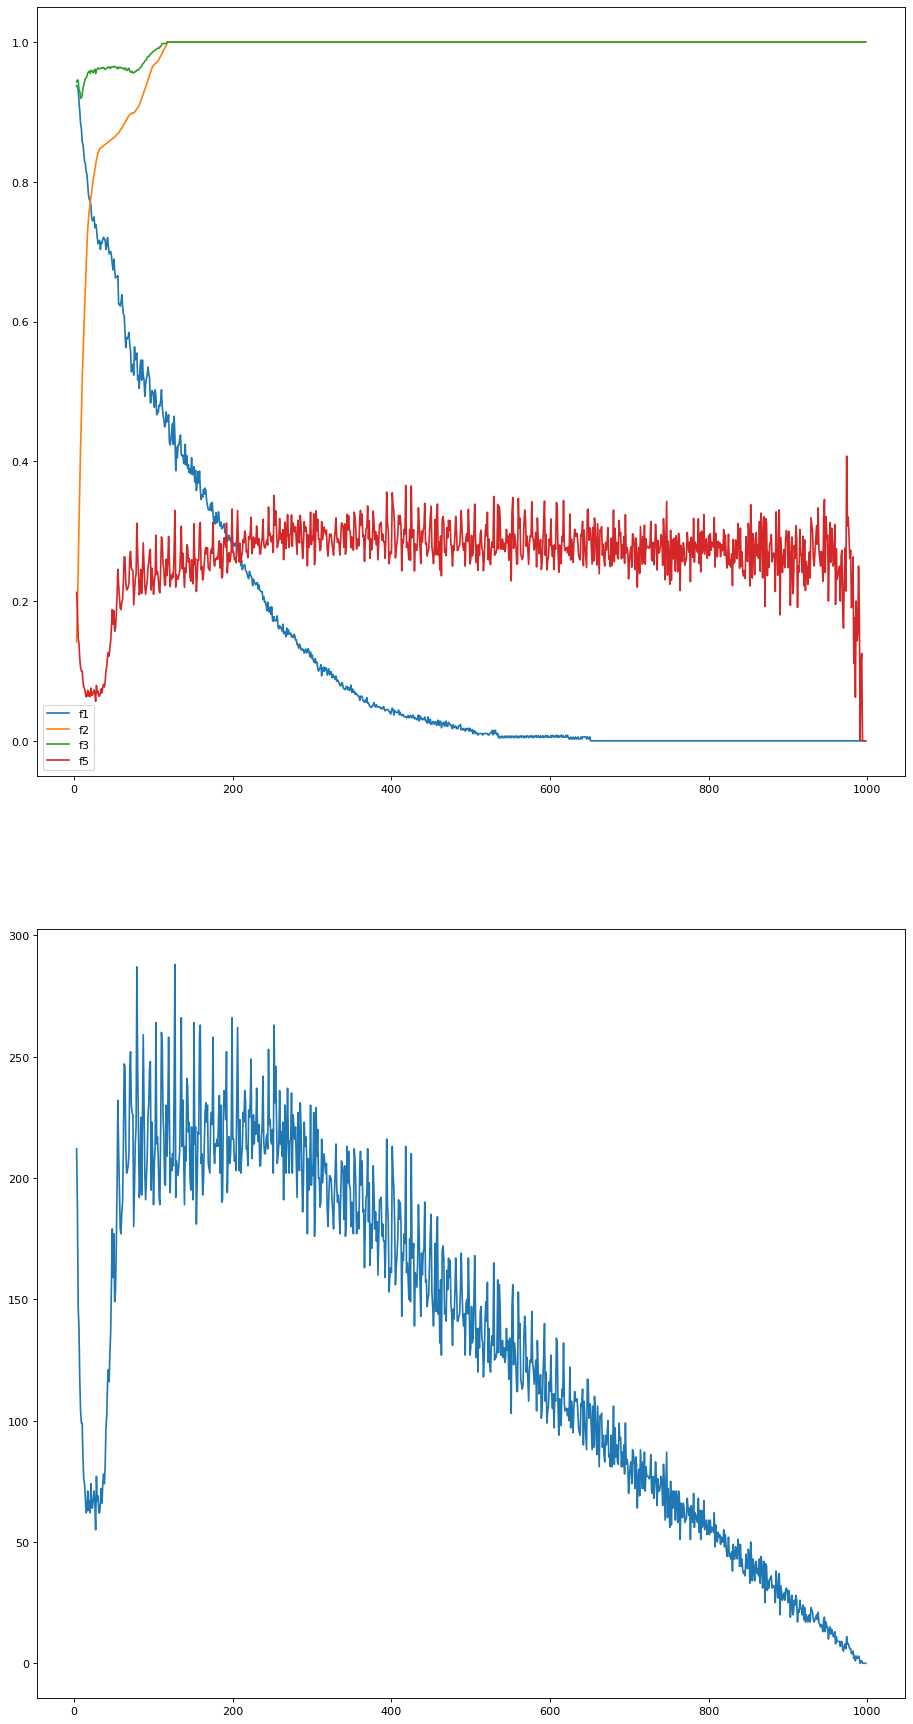

In [10]:
fig = plt.figure(figsize=(14, 28), dpi=80)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(ms, result.T[0], label="f1")
ax1.plot(ms, result.T[1], label="f2")
ax1.plot(ms, result.T[2], label="f3")
ax1.plot(ms, result.T[4], label="f5")
ax1.legend()
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(ms, result.T[3], label="f4")
plt.show()

Для ряда из 1000 элементов видно, что искомая размерность < 100, рассмотрим в этом диапазоне график поближе

метрики f1, f2, f3 взяты из алгоритма кеннела из статьи
 Determining embedding dimension for phase-space reconstruction using a geometrical construction

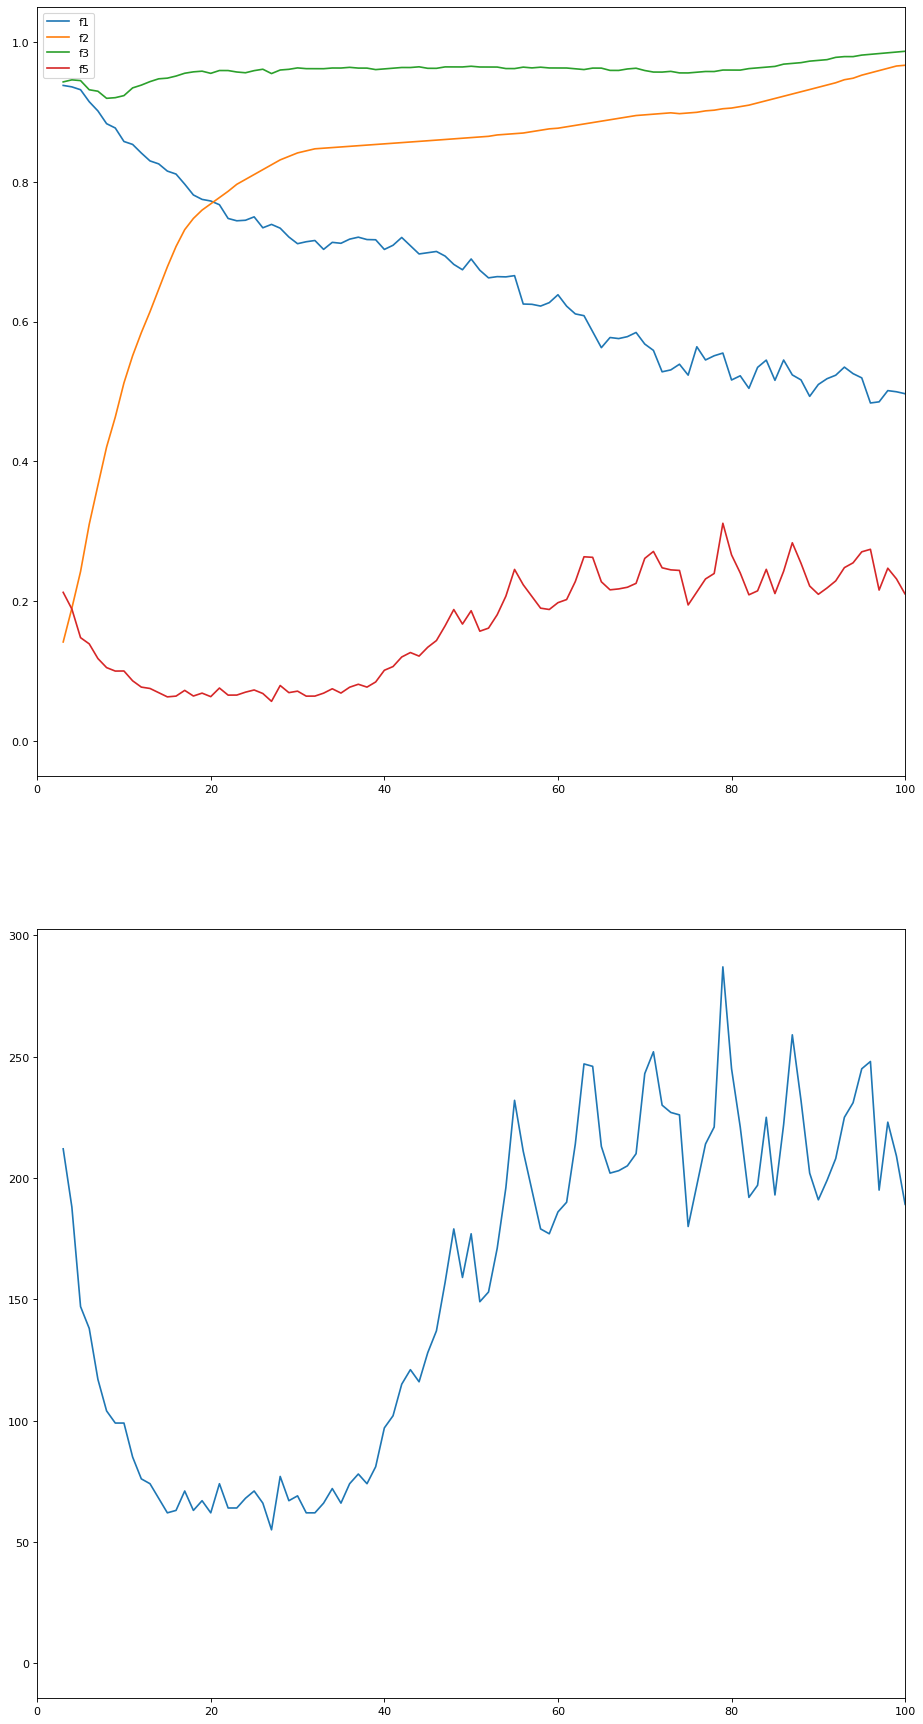

In [12]:
fig = plt.figure(figsize=(14, 28), dpi=80)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(ms, result.T[0], label="f1")
ax1.plot(ms, result.T[1], label="f2")
ax1.plot(ms, result.T[2], label="f3")
ax1.plot(ms, result.T[4], label="f5")
ax1.set_xlim(0, 100)
ax1.legend()
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(ms, result.T[3], label="f4")
ax2.set_xlim(0, 100)
plt.show()

In [14]:
print(np.argmin(result.T[2][:100]))

5

Оптимальным размером z веторов для такого маленького ряда получается 5

In [ ]:
with open('lorenz_results.npy', 'rb') as f:
    lorenz_ms = np.load(f)
    lorenz_result = np.load(f)
with open('sunspot_results.npy', 'rb') as f:
    sunspot_ms = np.load(f)
    sunspot_lapunovs = np.load(f)

In [18]:
optimal_ms = [5]
for m in optimal_ms:
    lorenz_lapunov = rosenstein.rosenstein_method(small_lorenz, m)
    lorenz_forecast_horizon = forecast_horizon(lorenz_lapunov, E_max=0.1, s = 0.01)
    print("for M =", m, ":")
    print("показатель Ляпунова:", lorenz_lapunov)
    print("горизонт прогнозир.:", lorenz_forecast_horizon)

finding neighbours
99.0%
making lapunov estimation
99.0%
for M = 5 :
показатель Ляпунова: 0.10557097045873934
горизонт прогнозир.: 21.810778881624216


Солнечные пятна

In [5]:
small_sunspot = sunspot[:1000]

In [18]:

ms = [i for i in range(20, len(small_sunspot) - 600)] # по экспериментам не появляется оптимальных m даже больше 100,
# поэтому для скорости рассматриваю m < 400
result_sunspot = FNN.FNN(small_sunspot, ms, num_neighbours = 15, A=2, B=1)

399

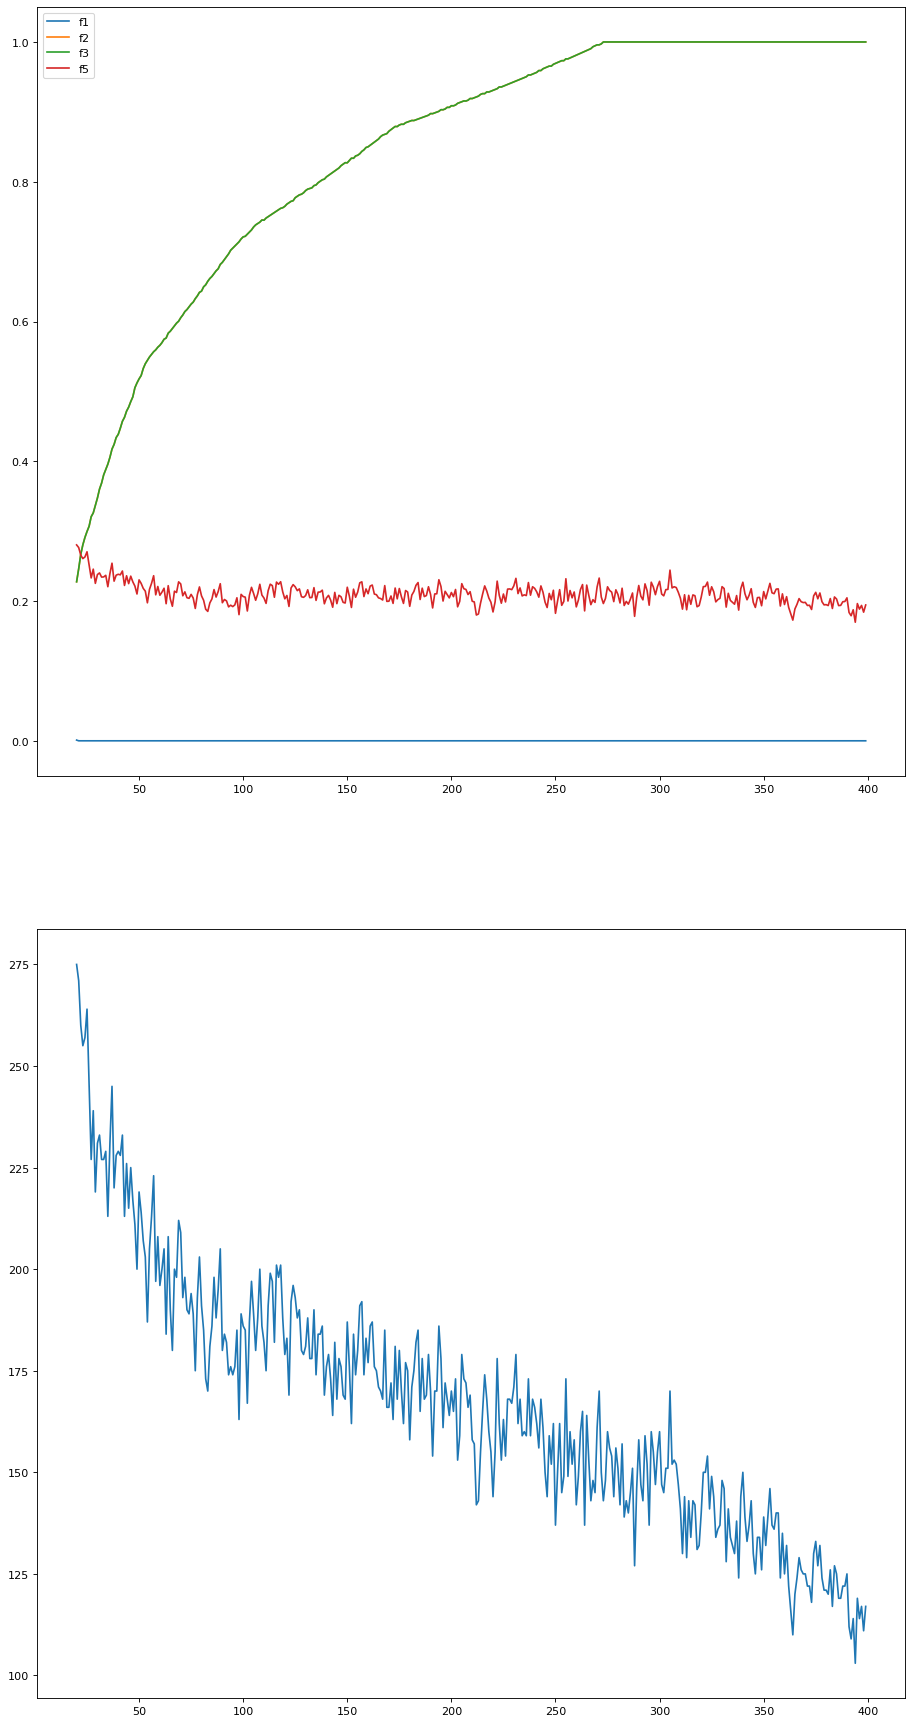

In [19]:
fig = plt.figure(figsize=(14, 28), dpi=80)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(ms, result_sunspot.T[0], label="f1")
ax1.plot(ms, result_sunspot.T[1], label="f2")
ax1.plot(ms, result_sunspot.T[2], label="f3")
ax1.plot(ms, result_sunspot.T[4], label="f5")
ax1.legend()
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(ms, result_sunspot.T[3], label="f4")
plt.show()

при M < 20 не удается найти соседей расстояние до которых больше нуля. Также судя по графикам M = ~20-25 является оптимальным.

In [10]:
optimal_ms = [25]
for m in optimal_ms:
    sunspot_lapunov = rosenstein.rosenstein_method(small_sunspot, m, num_neighbours=15)
    sunspot_forecast_horizon = forecast_horizon(sunspot_lapunov, E_max=0.1, s = 0.01)
    print("for M =", m, ":")
    print("показатель Ляпунова:", sunspot_lapunov)
    print("горизонт прогнозир.:", sunspot_forecast_horizon)

making lapunov estimation
99.0%
for M = 25 :
показатель Ляпунова: 0.028848922349265838
горизонт прогнозир.: 79.81528963603186


Плоскость энтропия/сложность

making z-vectors
making ordinal vectors
N = 26
calc Probabilities
calc Entropy
calc Complexity
Q_0 = 1.6369410761423766
C = 0.19812267062512245


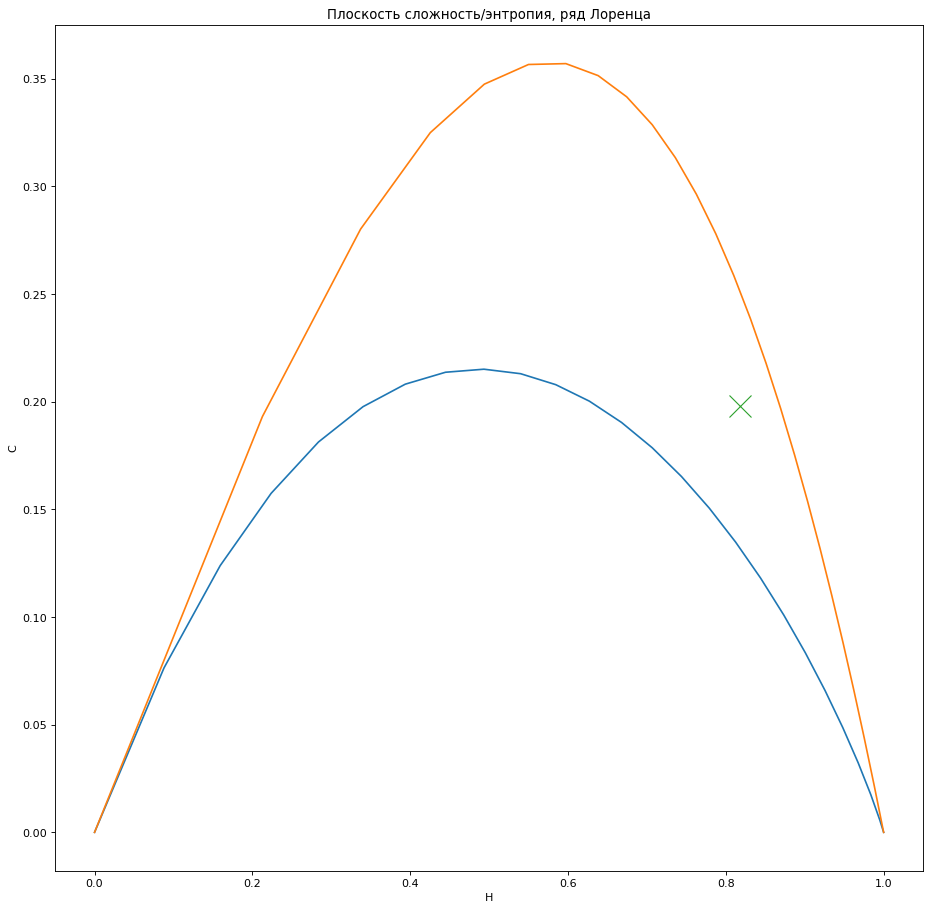

In [5]:
fig = plt.figure(figsize=(14, 14), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Плоскость сложность/энтропия, ряд Лоренца')
ax1.set_ylabel('C')
ax1.set_xlabel('H')

H, C, b = Entropy_Complexity.solution(lorenz, 5)
ax1.plot(b[0][0], b[0][1])
ax1.plot(b[1][0], b[1][1])
ax1.plot(H, C, marker = 'x', markersize=20)

Ряд Лоренца на грани посередине между хаотическими и регулярными системами.

making z-vectors
making ordinal vectors
N = 120
calc Probabilities
calc Entropy
calc Complexity
Q_0 = 1.4947340849734594
C = 0.1604976376907271


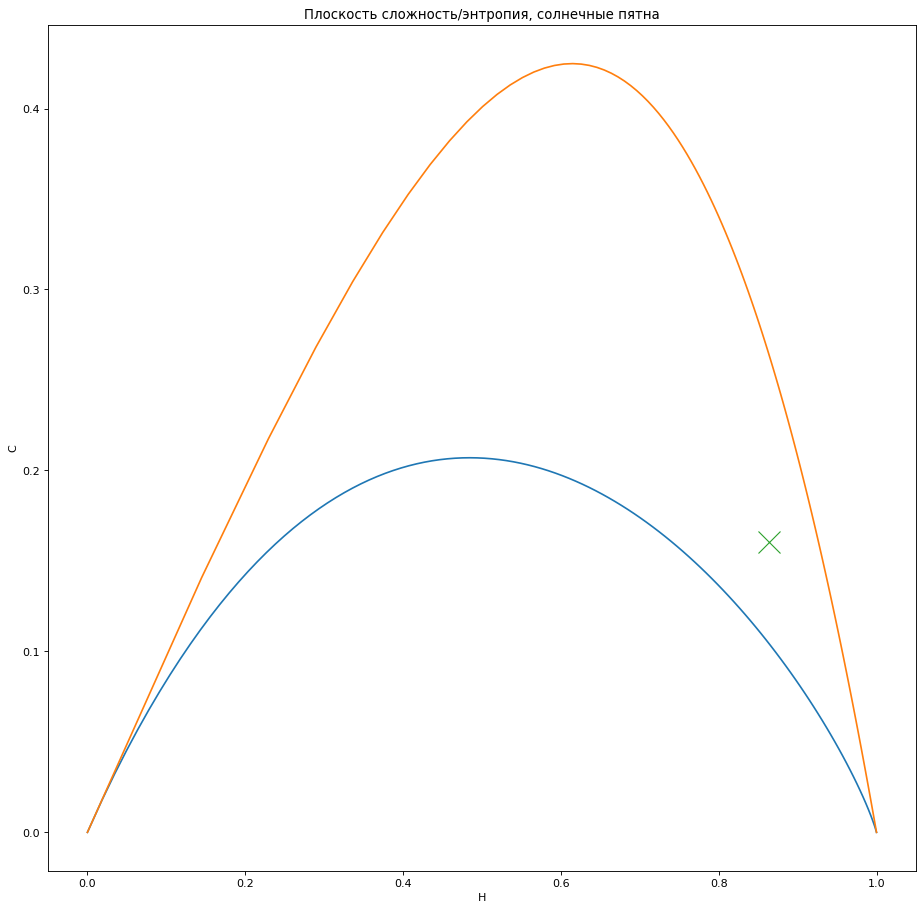

In [12]:
fig = plt.figure(figsize=(14, 14), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Плоскость сложность/энтропия, солнечные пятна')
ax1.set_ylabel('C')
ax1.set_xlabel('H')

H, C, b = Entropy_Complexity.solution(sunspot, 5)
ax1.plot(b[0][0], b[0][1])
ax1.plot(b[1][0], b[1][1])
ax1.plot(H, C, marker = 'x', markersize=20)

making z-vectors
making ordinal vectors
N = 9842
calc Probabilities
calc Entropy
calc Complexity
Q_0 = 1.443773800751831
C = 0.004370918239104934


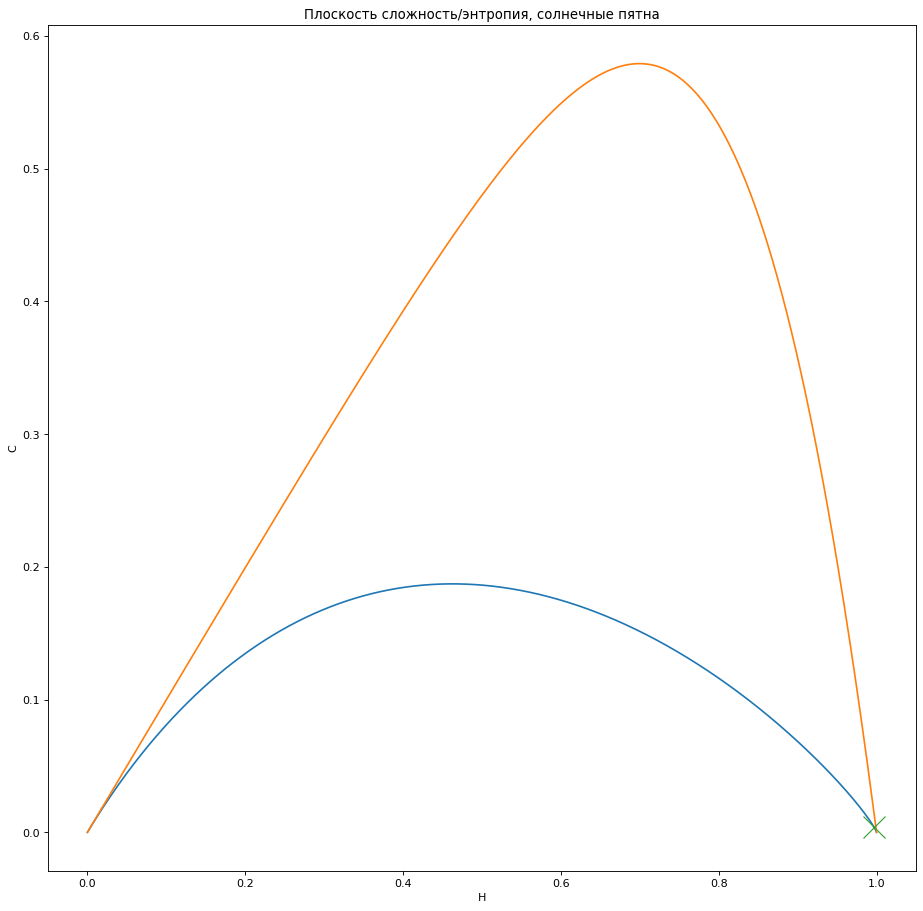

In [13]:
fig = plt.figure(figsize=(14, 14), dpi=80)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Плоскость сложность/энтропия, солнечные пятна')
ax1.set_ylabel('C')
ax1.set_xlabel('H')

H, C, b = Entropy_Complexity.solution(sunspot, 25)
ax1.plot(b[0][0], b[0][1])
ax1.plot(b[1][0], b[1][1])
ax1.plot(H, C, marker = 'x', markersize=20)

При M=5 ряд солнечных пятен немного ближе к регулярным рядам, чем ряд лоренца.
При M=25 ряд имеет высокую энтропию и малую сложность, чем похож на стохастику.